In [15]:
#%%
import os
import shutil
import random
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

from datetime import datetime

import math

import matplotlib.pyplot as plt
import csv
import re

import seaborn as sns



folder: test01
sample: CapiSampling_TS000000200.dat


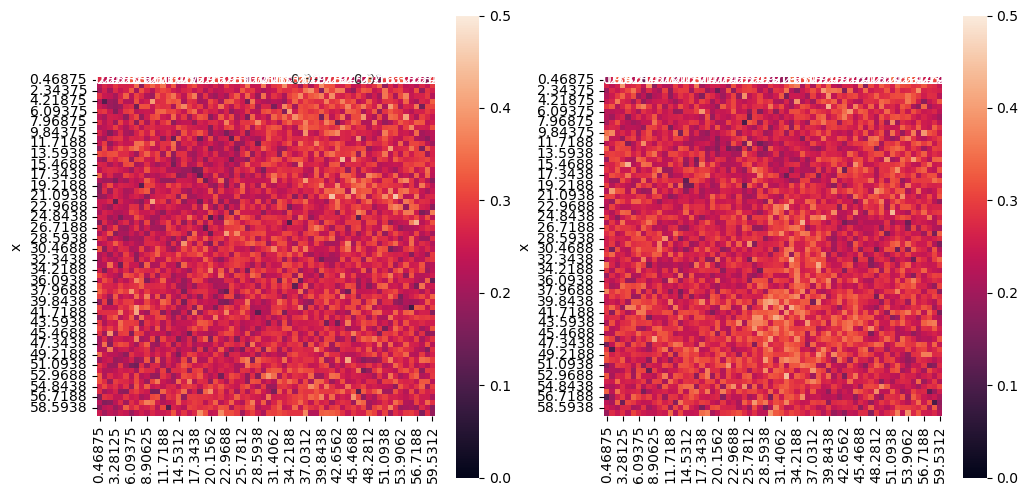

sample: CapiSampling_TS000000100.dat


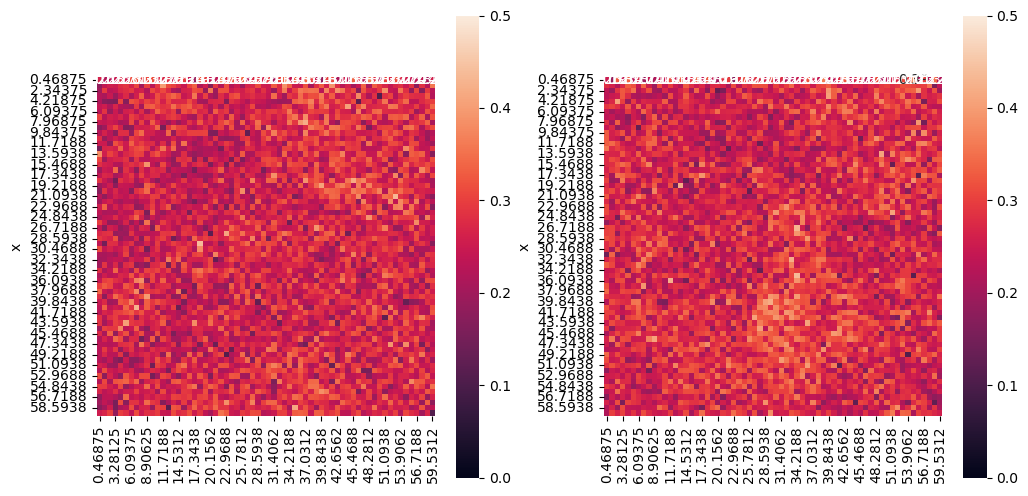

sample: CapiSampling_TS000000000.dat


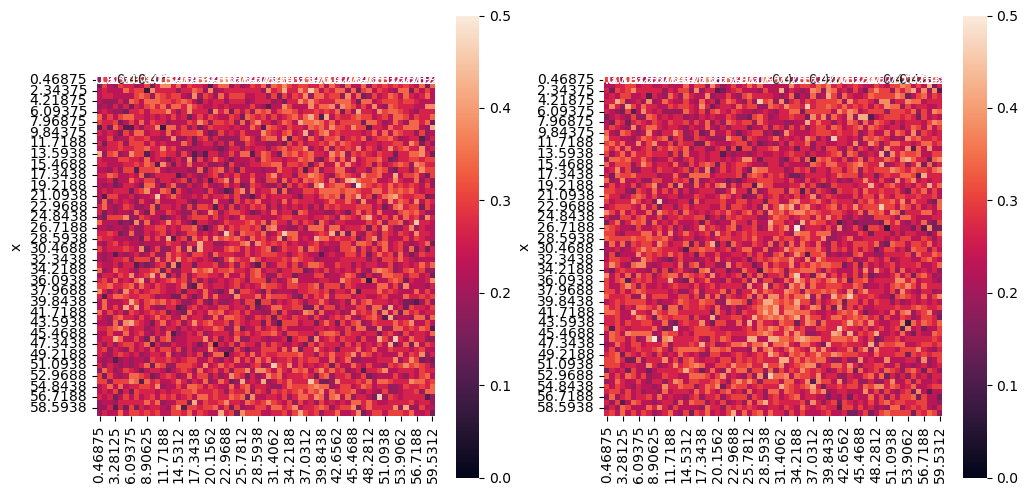

sample: CapiSampling_TS000000300.dat


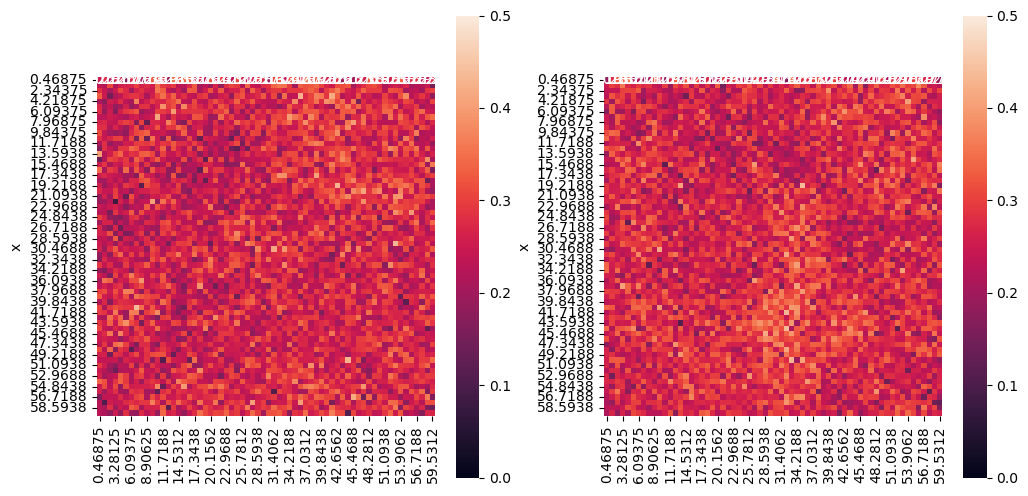

In [66]:
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]
folders = ['test01']

for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'CapiSampling_TS' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        print(f"folder: {folder}")
        for sample in scalarSamples:
            print(f'sample: {sample}')
            filePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(filePath, delimiter='\s+', index_col='x')

            leftDF = sampledf[sampledf['yIndex']==0]
            leftDF = leftDF.drop(['yIndex'], axis=1)

            rightDF = sampledf[sampledf['yIndex']==1]
            rightDF = rightDF.drop(['yIndex'], axis=1)

            plt.rcParams['figure.figsize'] = [12, 6]
            plt.subplot(1, 2, 1) # row 1, col 2 index 1
            ax = sns.heatmap(leftDF,annot=True, square=True, vmin=0, vmax=.5)
            plt.subplot(1, 2, 2) # row 1, col 2 index 2
            ax = sns.heatmap(rightDF,annot=True, square=True, vmin=0, vmax=.5)
            plt.show()
        





    

folder: T0.7_d20
no relevant files found in folder filmGenerator.
no relevant files found in folder ls1-mardyn.


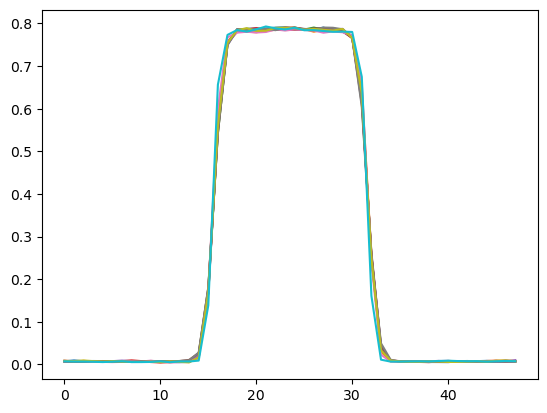

In [2]:
# folders = ["./T0.7_d20"]
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]

for folder in folders:
    dirList = os.listdir(folder)
    scalarSamples = [f for f in dirList if 'scalquant_all_reg1' in f]
    # print(dirList)
    if len(scalarSamples) == 0:
        print(f'no relevant files found in folder {folder}.')
    else:
        print(f"folder: {folder}")
        for sample in scalarSamples:
        # sample = scalarSamples[-1]
            samplePath = os.path.join(folder, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')

            sampledf["rho[0]"].plot()



In [22]:

def vle_kedia2006(T):
    '''
    Get saturated densities of DROPLET by Vrabec et al., Molecular Physics 104 (2006). Equation numbers refer this paper.
    :param float T: Temperature
    :return: float rhol, float rhov: Saturated liquid and vapor density
    '''
    Tc = 1.0779
    rc = 0.3190

    dT = (Tc-T)

    a,b,c=0.5649,0.1314,0.0413
    rhol=rc+a*dT**(1/3.)+b*dT+c*dT**(3/2.)       # equation 4
    a,b,c=0.5649,0.2128,0.0702
    rhov=rc-a*dT**(1/3.)+b*dT+c*dT**(3/2.)       # equation 5

    return rhol,rhov



In [23]:
vle_kedia2006(.7)

(0.7866611943875055, 0.007314397513485199)